In [9]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import r2_score



from sklearn.datasets import load_diabetes

In [10]:
data = load_diabetes()
df = pd.DataFrame(data.data,columns=data.feature_names)
df['Target']=data.target


In [11]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [12]:
x_train, x_test, y_train ,y_test = train_test_split(data.data,data.target,test_size=0.2,random_state=2)

In [45]:
# Effect of lambda values on Lasso Model
coefs= []
r2_scores = []

for i in [0,0.1,1,100]:
    regL = Lasso(alpha=i)
    regL.fit(x_train,y_train)
    
    coefs.append(regL.coef_.tolist())
    y_pred= regL.predict(x_test)
    r2_scores.append(r2_score(y_test,y_pred))
    


C:\Users\medee\AppData\Local\Temp\ipykernel_13416\1219290176.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regL.fit(x_train,y_train)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.967e+05, tolerance: 2.124e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


Text(0.5, 1.0, 'alpha = 0 r2_score = -0.01')

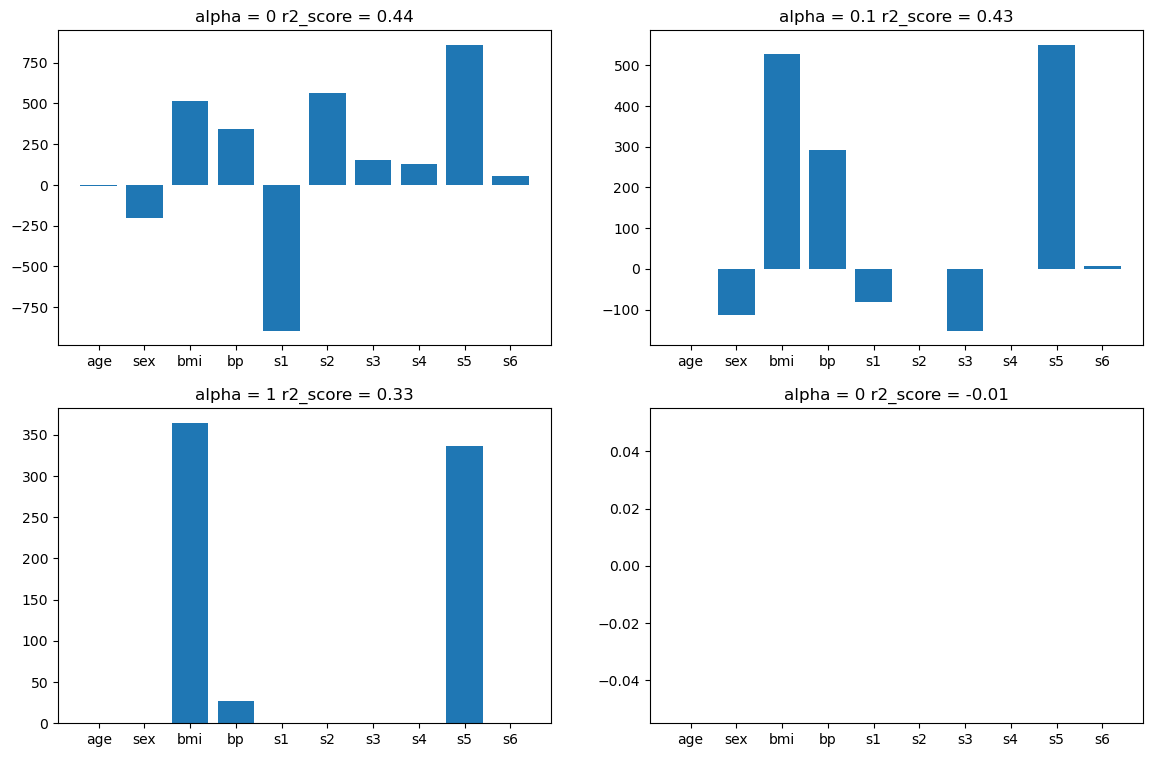

In [46]:
plt.figure(figsize=(14,9))

plt.subplot(2,2,1)
plt.bar(data.feature_names,coefs[0])
plt.title('alpha = 0 r2_score = {}'.format(round(r2_scores[0],2)))

plt.subplot(2,2,2)
plt.bar(data.feature_names,coefs[1])
plt.title('alpha = 0.1 r2_score = {}'.format(round(r2_scores[1],2)))

plt.subplot(2,2,3)
plt.bar(data.feature_names,coefs[2])
plt.title('alpha = 1 r2_score = {}'.format(round(r2_scores[2],2)))

plt.subplot(2,2,4)
plt.bar(data.feature_names,coefs[3])
plt.title('alpha = 0 r2_score = {}'.format(round(r2_scores[3],2)))




In [47]:
# Effect of lambda values on Ridge Model
coefs= []
r2_scores = []

for i in [0,0.1,1,100]:
    regL = Ridge(alpha=i)
    regL.fit(x_train,y_train)
    
    coefs.append(regL.coef_.tolist())
    y_pred= regL.predict(x_test)
    r2_scores.append(r2_score(y_test,y_pred))
    

Text(0.5, 1.0, 'alpha = 0 r2_score = 0.01')

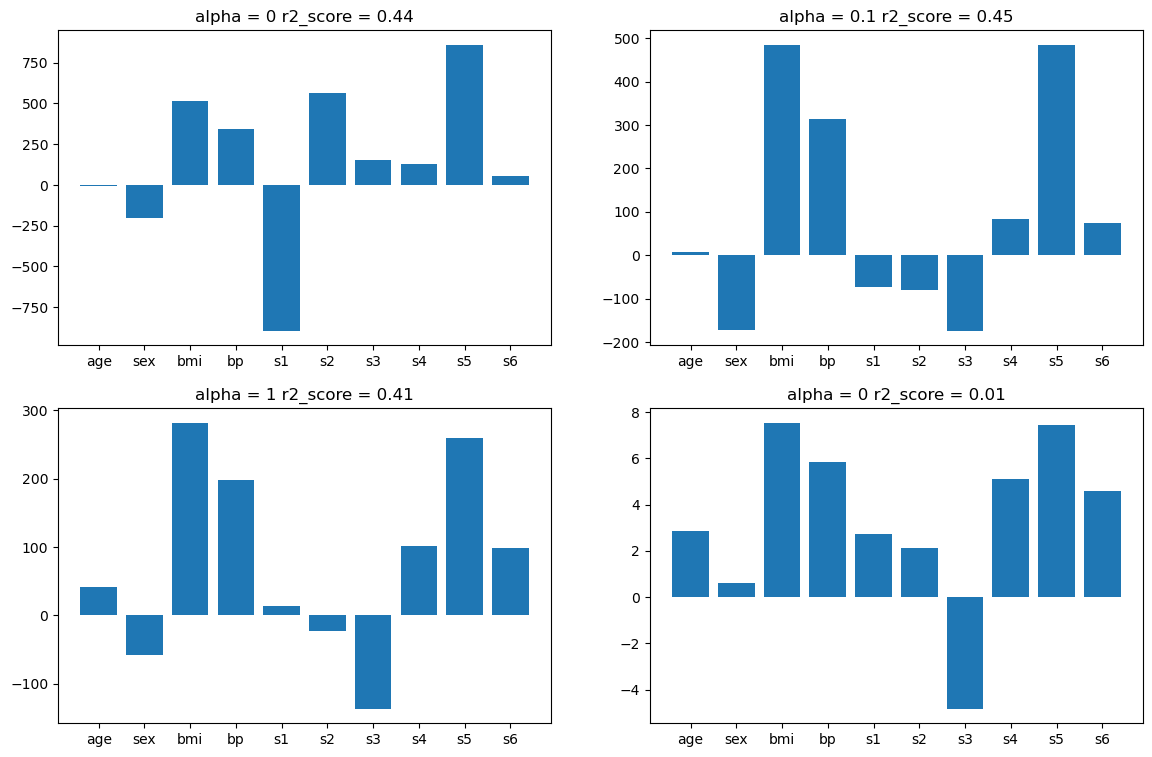

In [48]:
plt.figure(figsize=(14,9))

plt.subplot(2,2,1)
plt.bar(data.feature_names,coefs[0])
plt.title('alpha = 0 r2_score = {}'.format(round(r2_scores[0],2)))

plt.subplot(2,2,2)
plt.bar(data.feature_names,coefs[1])
plt.title('alpha = 0.1 r2_score = {}'.format(round(r2_scores[1],2)))

plt.subplot(2,2,3)
plt.bar(data.feature_names,coefs[2])
plt.title('alpha = 1 r2_score = {}'.format(round(r2_scores[2],2)))

plt.subplot(2,2,4)
plt.bar(data.feature_names,coefs[3])
plt.title('alpha = 0 r2_score = {}'.format(round(r2_scores[3],2)))


# 2 Higher Coefficient are effected more

In [49]:
# want to check the effect on each feature due to change in value of alpha- Lasso

alpha =[0,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
coef= [] 

for i in alpha:
    reg= Lasso(alpha=i)
    reg.fit(x_train,y_train)
    coef.append(reg.coef_.tolist())
        


C:\Users\medee\AppData\Local\Temp\ipykernel_13416\1854049064.py:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  reg.fit(x_train,y_train)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.967e+05, tolerance: 2.124e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [50]:
input_array = np.array(coef)
coef_df =pd.DataFrame(input_array,columns=data.feature_names)
coef_df['alpha']=alpha
coef_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,alpha
0,-9.160885,-205.462260,516.684624,340.627341,-895.543596,561.214523,153.884780,126.734314,861.121395,52.419828,0.0000
1,-9.071288,-205.337332,516.780313,340.539730,-888.652320,555.952271,150.585260,125.453044,858.639860,52.379002,0.0001
2,-8.264924,-204.213177,517.641106,339.751339,-826.653342,508.609613,120.899583,113.924518,836.314382,52.011583,0.0010
3,-1.361404,-192.944226,526.348511,332.649058,-430.205495,191.277876,-44.048113,68.990747,688.384976,47.939528,0.0100
4,0.000000,-113.976046,526.737112,292.635423,-82.691928,-0.000000,-152.691332,0.000000,551.077200,7.169852,0.1000
5,0.000000,0.000000,363.882636,27.278420,0.000000,0.000000,-0.000000,0.000000,336.135971,0.000000,1.0000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,10.0000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,100.0000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,1000.0000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,10000.0000


In [51]:
# want to check the effect on each feature due to change in value of alpha-Ridge


alpha =[0,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
coef= [] 

for i in alpha:
    reg= Ridge(alpha=i)
    reg.fit(x_train,y_train)
    coef.append(reg.coef_.tolist())

input_array = np.array(coef)
coef_df =pd.DataFrame(input_array,columns=data.feature_names)
coef_df['alpha']=alpha
coef_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,alpha
0,-9.160885,-205.462260,516.684624,340.627341,-895.543609,561.214533,153.884786,126.734316,861.121400,52.419828,0.0000
1,-9.118336,-205.337133,516.880570,340.556792,-883.415291,551.553259,148.578680,125.355917,856.480254,52.467627,0.0001
2,-8.763583,-204.321125,518.371729,339.975385,-787.690766,475.274718,106.786540,114.632063,819.739542,52.872100,0.0010
3,-6.401088,-198.669767,522.048548,336.348363,-383.709187,152.663678,-66.060583,75.611090,659.869402,55.828128,0.0100
4,6.642753,-172.242166,485.523872,314.682122,-72.939323,-80.590053,-174.466515,83.616653,484.363285,73.584154,0.1000
5,42.242217,-57.305508,282.170831,198.061386,14.363544,-22.551274,-136.930053,102.023193,260.104308,98.552274,1.0000
6,21.174004,1.659796,63.659772,48.493240,18.421492,12.875448,-38.915435,38.842464,61.612405,35.505355,10.0000
7,2.858979,0.629452,7.540604,5.849997,2.710879,2.142134,-4.834047,5.108223,7.448466,4.576129,100.0000
8,0.295726,0.069290,0.769004,0.597829,0.282900,0.225936,-0.495607,0.527031,0.761497,0.471029,1000.0000
9,0.029674,0.006995,0.077054,0.059915,0.028412,0.022715,-0.049686,0.052870,0.076321,0.047241,10000.0000
